<a href="https://colab.research.google.com/github/Muhammad-kaif2/machine_learning_Feature_eng/blob/main/Task_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [ ]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Your Code goes Here
wine.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
x = wine.drop('quality', axis=1)
y = wine['quality']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)
type_encoded = ohe.fit_transform(x[['type']])
type_df = pd.DataFrame(type_encoded, columns=['type_white_red'])
x = pd.concat([x, type_df], axis=1)
x = x.drop('type', axis=1)

In [ ]:
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
X_train_imputed

array([[ 6.6 ,  0.25,  0.36, ...,  0.42,  9.2 ,  1.  ],
       [ 8.5 ,  0.16,  0.35, ...,  0.36, 10.  ,  1.  ],
       [ 6.  ,  0.28,  0.34, ...,  0.38, 10.2 ,  1.  ],
       ...,
       [13.4 ,  0.27,  0.62, ...,  0.67,  9.7 ,  0.  ],
       [ 8.9 ,  0.4 ,  0.51, ...,  0.9 , 13.4 ,  0.  ],
       [ 8.1 ,  0.27,  0.35, ...,  0.63, 10.4 ,  1.  ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = model.predict(X_test_pca)
print("🎯 KNN + PCA Accuracy:", accuracy_score(y_test, y_pred))

🎯 KNN + PCA Accuracy: 0.57


In [ ]:
for n in range (1,13):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=18)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    print(f"n_components={n} → Accuracy: {accuracy_score(y_test, y_pred):.4f}")


n_components=1 → Accuracy: 0.4408
n_components=2 → Accuracy: 0.4831
n_components=3 → Accuracy: 0.4815
n_components=4 → Accuracy: 0.5085
n_components=5 → Accuracy: 0.5377
n_components=6 → Accuracy: 0.5300
n_components=7 → Accuracy: 0.5377
n_components=8 → Accuracy: 0.5485
n_components=9 → Accuracy: 0.5608
n_components=10 → Accuracy: 0.5731
n_components=11 → Accuracy: 0.5662
n_components=12 → Accuracy: 0.5600


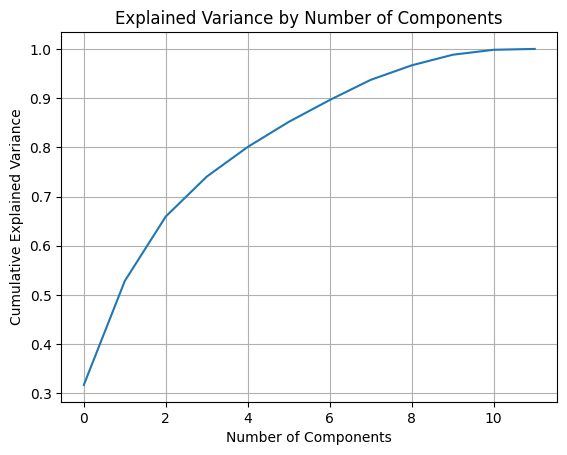

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

for i in range (1,13):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  model = RandomForestClassifier(random_state=42)
  model.fit(X_train_pca, y_train)
  y_pred = model.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with {i} components: {accuracy}")

Accuracy with 1 components: 0.53
Accuracy with 2 components: 0.6061538461538462
Accuracy with 3 components: 0.6123076923076923
Accuracy with 4 components: 0.6330769230769231
Accuracy with 5 components: 0.6507692307692308
Accuracy with 6 components: 0.66
Accuracy with 7 components: 0.6592307692307692
Accuracy with 8 components: 0.6715384615384615
Accuracy with 9 components: 0.6653846153846154
Accuracy with 10 components: 0.6707692307692308
Accuracy with 11 components: 0.676923076923077
Accuracy with 12 components: 0.6723076923076923


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

for i in range (1,12):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  model = KNeighborsClassifier()
  model.fit(X_train_pca, y_train)
  y_pred = model.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with {i} components: {accuracy}")

Accuracy with 1 components: 0.4276923076923077
Accuracy with 2 components: 0.48923076923076925
Accuracy with 3 components: 0.5246153846153846
Accuracy with 4 components: 0.5438461538461539
Accuracy with 5 components: 0.5415384615384615
Accuracy with 6 components: 0.5553846153846154
Accuracy with 7 components: 0.5507692307692308
Accuracy with 8 components: 0.56
Accuracy with 9 components: 0.566923076923077
Accuracy with 10 components: 0.556923076923077
Accuracy with 11 components: 0.5592307692307692


In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


for i in range (1,12): # Start the loop from 1
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  model =  XGBClassifier(
    objective='multi:softmax',  # multiclass classification
    num_class=len(label_encoder.classes_),  # Use the number of encoded classes
    learning_rate=0.1,
    n_estimators=300,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)
  model.fit(X_train_pca, y_train_encoded) # Use the encoded target variable
  y_pred = model.predict(X_test_pca)
  accuracy = accuracy_score(y_test_encoded, y_pred) # Use the encoded target variable for evaluation
  print(f"Accuracy with {i} components: {accuracy}") # Print the accuracy for each iteration

Accuracy with 1 components: 0.4523076923076923
Accuracy with 2 components: 0.4707692307692308
Accuracy with 3 components: 0.5776923076923077
Accuracy with 4 components: 0.6338461538461538
Accuracy with 5 components: 0.6438461538461538
Accuracy with 6 components: 0.65
Accuracy with 7 components: 0.6615384615384615
Accuracy with 8 components: 0.6792307692307692
Accuracy with 9 components: 0.6746153846153846
Accuracy with 10 components: 0.6846153846153846
Accuracy with 11 components: 0.6838461538461539


In [ ]:
# Eigen Value
pca.explained_variance_

array([3.81835588, 2.51408439, 1.56136671, 0.96086126, 0.72559801,
       0.61960057, 0.5386296 , 0.51081537, 0.35492896, 0.25776748,
       0.11519529, 0.02510595])

In [ ]:
# Eigen Vector
pca.components_.shape

(12, 12)

In [ ]:
pca.explained_variance_ratio_

array([0.3181351 , 0.20946672, 0.13008886, 0.08005636, 0.06045487,
       0.05162345, 0.04487716, 0.04255976, 0.02957172, 0.02147649,
       0.00959776, 0.00209176])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3181351 , 0.52760182, 0.65769067, 0.73774704, 0.7982019 ,
       0.84982535, 0.89470251, 0.93726227, 0.96683399, 0.98831048,
       0.99790824, 1.        ])

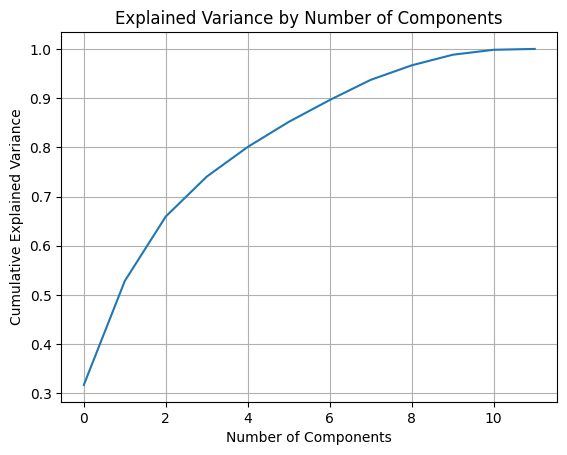

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()